## Open Information Extraction
Open information extraction (open IE) refers to the extraction of relation tuples, typically binary relations, from plain text, such as (Mark Zuckerberg; founded; Facebook). The central difference from other information extraction is that the schema for these relations does not need to be specified in advance; typically the relation name is just the text linking two arguments.
- StanfordOpenIE (https://nlp.stanford.edu/software/openie.html) StanfordOpenIE is part of StanfordCoreNLP, which is built on top of PyTorch 1.0.0. 
 - Therefore, first install pytorch (https://pytorch.org/get-started/locally/), select your  os, package, language, cuda , then use the   command to install.
 - Install StanfordOpenIE using ``pip install stanford-openie``(https://pypi.org/project/stanford-openie/)
 - Install Java SE Development Kit 8 (https://www.oracle.com/technetwork/java/javase/downloads/jdk8-downloads-2133151.html/)
 - Install graphviz : conda install python-graphviz
 - Unzip the stanford-corenlp-full-2018-10-05.zip to "C:\Users\UIC\stanfordnlp_resources"

In [2]:
import nltk
from nltk import pos_tag, word_tokenize, ne_chunk, Tree
from openie import StanfordOpenIE
from graphviz import Digraph

### Triple Extraction from text using ``StanfordOpenIE``

In [3]:
# Example code for using StanfordOpenIE in python
from openie import StanfordOpenIE

with StanfordOpenIE() as client:
    text = '''Barack Obama was the 44th president of the United States, and the first African American to serve in the office.
          On October 3, 1992,  Barack Obama married  Michelle Robinson at Trinity United Church in Chicago.'''
    print('Text: %s.' % text)
    for triple in client.annotate(text):
        print('|-', triple)

Text: Barack Obama was the 44th president of the United States, and the first African American to serve in the office.
          On October 3, 1992,  Barack Obama married  Michelle Robinson at Trinity United Church in Chicago..
Starting server with command: java -Xmx8G -cp C:\Users\56492\.stanfordnlp_resources\stanford-corenlp-4.1.0/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-b39b18264b2248cc.props -preload openie
|- {'subject': 'Barack Obama', 'relation': 'was 44th president of', 'object': 'United States'}
|- {'subject': 'Barack Obama', 'relation': 'was president of', 'object': 'United States'}
|- {'subject': 'Barack Obama', 'relation': 'was', 'object': 'president'}
|- {'subject': 'Barack Obama', 'relation': 'was', 'object': '44th president'}
|- {'subject': 'Trinity United Church', 'relation': 'is in', 'object': 'Chicago'}
|- {'subject': 'Barack Obama', 'relation': 'married', 

For each sentence, StanfordOpenIE will return several triples with high confidence scores. To further refine the results, we can perform filtering by some constraints:
- The subjet and object must be named entity from some predfined types
- The relation must be verb or verb phrases (chunk rule)

Come up with your own refinement strategy to get a better result.

In [55]:
def extract_triple(text):
    # your implementation
    entity = []
    VBDS = []
    chunks = ne_chunk(pos_tag(word_tokenize(text)))
    print(chunks)
    for i in chunks:
        if type(i) != Tree:
            if i[1]=='VBD' or i[1]=='VB':
                VBDS.append(i[0])
        if type(i) == Tree:
            tokens = []
            for token,pos in i.leaves():
                tokens.append(token)
            new_tok = ' '.join(tokens)
            entity.append(new_tok)
    print(VBDS)        
    # obtain chunks using ne_chunk()
    # store all tokens of named entities(chunks) in a python list
    triples = []
    client =  StanfordOpenIE()
    for triple in client.annotate(text):
        if triple['subject'] in entity and triple['object'] in entity:
            det = False
            for i in VBDS:
                if i in triple['relation']:
                    print(triple['relation'])
                    det = True
                    break
            if det == True:
                triples.append([triple['subject'], triple['relation'],  triple['object']])
    return triples


tr = extract_triple(""" Barack Obama was the 44th president of the United States, and the first African American to serve in the office.
          On October 3, 1992,  Barack Obama married  Michelle Robinson at Trinity United Church in Chicago. """)
print("Extracted Triples:",tr)

(S
  (PERSON Barack/NNP)
  (PERSON Obama/NNP)
  was/VBD
  the/DT
  44th/JJ
  president/NN
  of/IN
  the/DT
  (GPE United/NNP States/NNPS)
  ,/,
  and/CC
  the/DT
  first/JJ
  (ORGANIZATION African/JJ American/NNP)
  to/TO
  serve/VB
  in/IN
  the/DT
  office/NN
  ./.
  On/IN
  October/NNP
  3/CD
  ,/,
  1992/CD
  ,/,
  (PERSON Barack/NNP Obama/NNP)
  married/VBD
  (PERSON Michelle/NNP Robinson/NNP)
  at/IN
  (ORGANIZATION Trinity/NNP United/NNP Church/NNP)
  in/IN
  (GPE Chicago/NNP)
  ./.)
['was', 'serve', 'married']
Starting server with command: java -Xmx8G -cp C:\Users\56492\.stanfordnlp_resources\stanford-corenlp-4.1.0/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-d578b9d3078d4f9f.props -preload openie
was 44th president of
was president of
married
married Michelle Robinson at
Extracted Triples: [['Barack Obama', 'was 44th president of', 'United States'], ['Barack Obama', 'wa

### Construct the KB from Triples
Given the knowledge triples, we need to index all the entities and relations, i.e.,get the entity set and relation set, and represent each triple using entity id and relation id.

In [56]:
def KB(triples):
    # your implementation
    ent = []
    rel = []
    for i in triples:
        ent.append(i[2])
        ent.append(i[0])
        rel.append(i[1])
    unent = set(ent)
    ind = range(len(unent))
    id_en = dict(zip(ind, unent))
#     print(id_en)
    
    unrel = set(rel)
    id_re = dict(zip(ind, unrel))
     
    triples_id = []
    for i in triples:
        idx = []
        idx.append(list(id_en.keys())[list(id_en.values()).index(i[0])])
        idx.append(list(id_re.keys())[list(id_re.values()).index(i[1])])
        idx.append(list(id_en.keys())[list(id_en.values()).index(i[2])])
        triples_id.append(idx)
    
    #return three newly created dictionaries for entities, relations and triples
    return id_en,id_re,triples_id
kb = KB(tr)
print("Entities:", kb[0], "\nRelations:",kb[1], "\nTriples:",kb[2])

Entities: {0: 'Michelle Robinson', 1: 'United States', 2: 'Barack Obama', 3: 'Trinity United Church'} 
Relations: {0: 'married', 1: 'was president of', 2: 'married Michelle Robinson at', 3: 'was 44th president of'} 
Triples: [[2, 3, 1], [2, 1, 1], [2, 0, 0], [2, 2, 3]]


### Visualize the KB using ``graphviz``
- To render the graph, the dependency is a working installation of ``Graphviz`` (https://www.graphviz.org/download/).
- After installing Graphviz, make sure that its ``bin/`` subdirectory containing the layout commands for rendering graph descriptions (dot, circo, neato, etc.) is on your systems’ path: On the command-line, ``dot -V`` should print the version of your Graphiz installation.
- Refer to https://graphviz.readthedocs.io/en/stable/manual.html for the user guid of graphviz

In [57]:
def visualizeKB(kb_input):
    # your implementation
    dot = Digraph(comment='KB-Demo')    
    for i in range(len(kb_input[0])):
        dot.node(str(list(kb[0].keys())[i]), kb[0][i])
    for i in range(len(kb_input[0])):
        dot.edge(str(kb_input[2][i][0]), str(kb_input[2][i][2]), kb_input[1][kb_input[2][i][1]])
    return dot
dot = visualizeKB(kb)
print(dot.source)

// KB-Demo
digraph {
	0 [label="Michelle Robinson"]
	1 [label="United States"]
	2 [label="Barack Obama"]
	3 [label="Trinity United Church"]
	2 -> 1 [label="was 44th president of"]
	2 -> 1 [label="was president of"]
	2 -> 0 [label=married]
	2 -> 3 [label="married Michelle Robinson at"]
}


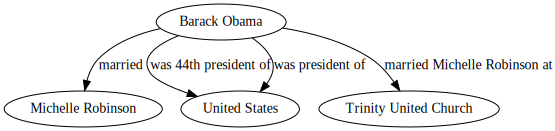

In [58]:
dot.render('kb-demo', view=True) 
dot